## Simple Fast Gradient Signed Method adversarial attack on ImageNet neural network

Sources:

https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

https://arxiv.org/abs/1412.6572

FGSM attack is a form of whitebox adversarial attack, so the attacker has access to all nn elements. We need to have access to the loss function used by the nn.  

In order to perform adversarial attack, we need to compute so called adversarial examples prepared specially to confuse nn. These minor changes made in original inputs should be indistinguishable to human eyes.

### How Fast gradient sign method works?

The fast gradient sign method works by using the gradients of the neural network to create an adversarial example. For an input image, the method uses the gradients of the loss with respect to the input image to create a new image that maximises the loss. This new image is called the adversarial image. This can be summarised using the following expression:

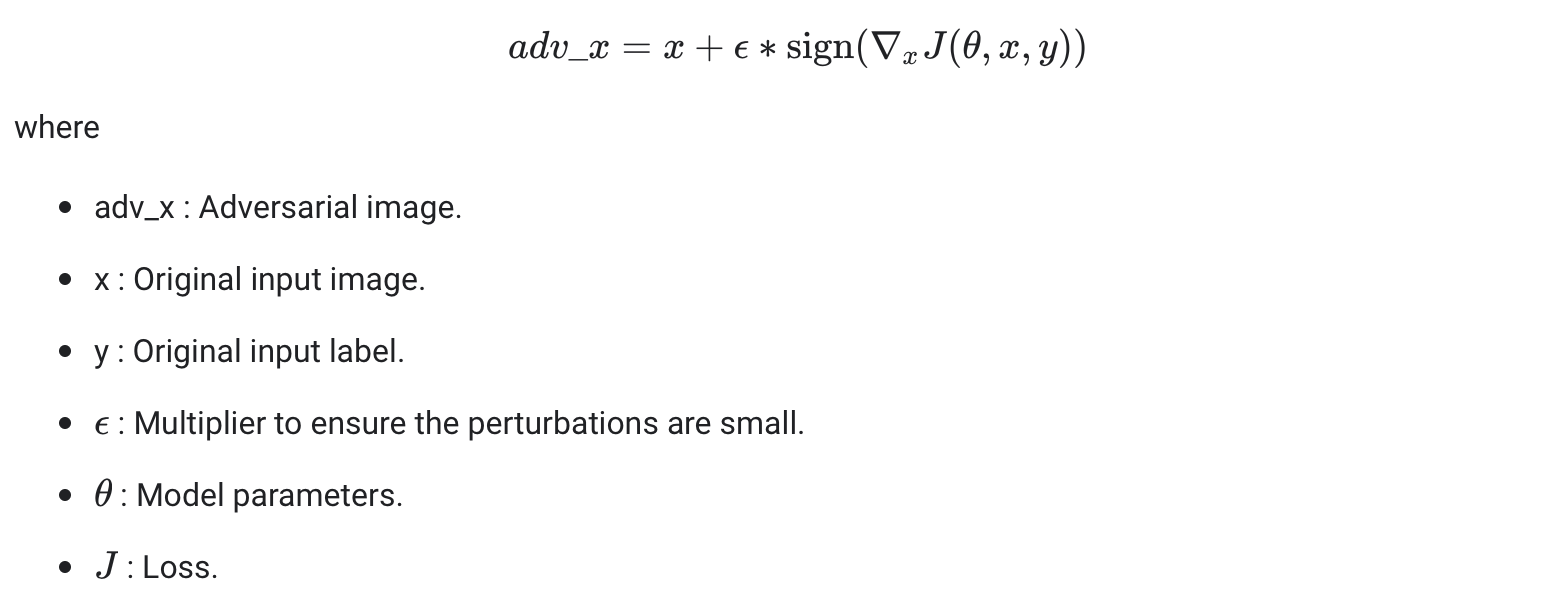


In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

Loading MobileNetV2 nn for ImageNet

In [2]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False
# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

14540800/14536120 [==============================] - 37s 3us/step


In [3]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

Getting input image and preprocessing for MobileNetV2

In [4]:
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)
image = preprocess(image)

90112/83281 [================================] - 0s 1us/step


Running stock input image predictions in nn

In [8]:
image_probs = pretrained_model.predict(image)

TensorShape([1, 224, 224, 3])

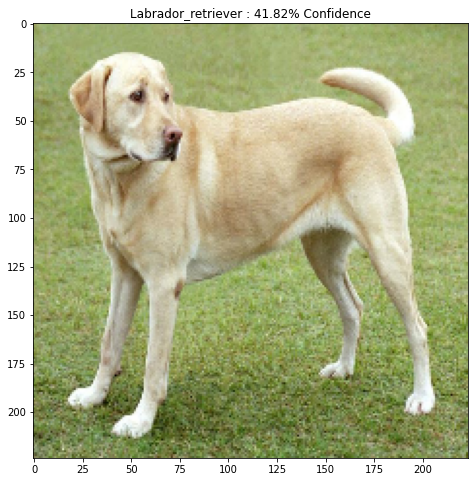

In [10]:
plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()